In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import argrelextrema


def f1(z):
    return z**3 - z**2 + (2-1j)*z - 1 - 1j

def f1_prime(z):
    return 3*z**2 - 2*z + (2-1j)

def f1_prime_prime(z):
    return 6*z - 2

def g(z):
    return z**3 + z

def g_prime(z):
    return 3*z**2 + 1

def g_prime_prime(z):
    return 6*z

def h(z):
    return z**3 - z**2 - z + 1

def h_prime(z):
    return 3*z**2 - 2*z - 1

def h_prime_prime(z):
    return 6*z - 2

def fCr(f,r):
  values = []
  phi_range = np.arange(0,2 * np.pi,0.0001)
  for phi in phi_range:
    z = cmath.rect(r,phi)
    values.append(f(z))
  
  return (phi_range,values)

def complex_print(phi_range,values):
  
  to_plot_real = [z.real for z in values]
  to_plot_imag = [z.imag for z in values]
  x_limit = 1.1*max([abs(z) for z in to_plot_real])
  y_limit = 1.1*max([abs(z) for z in to_plot_imag])
  limit = max(x_limit,y_limit)

  plt.figure(figsize=(8,8))
  plt.axhline(y=0, color='gray', linestyle='--', lw=0.5)
  plt.axvline(x=0, color='gray', linestyle='--', lw=0.5)
  plt.plot(to_plot_real, to_plot_imag)
  plt.xlim([-limit,limit])
  plt.ylim([-limit,limit])
  plt.xlabel("Re", fontsize=20)
  plt.ylabel("Im", fontsize=20)

  plt.show()

def complex_zoom_print(phi_range,values,limit):
  
  to_plot_real = [z.real for z in values]
  to_plot_imag = [z.imag for z in values]

  plt.figure(figsize=(8,8), edgecolor = "orange")
  plt.axhline(y=0, color='gray', linestyle='--', lw=0.5)
  plt.axvline(x=0, color='gray', linestyle='--', lw=0.5)
  plt.plot(to_plot_real, to_plot_imag)
  plt.xlim([-limit,limit])
  plt.ylim([-limit,limit])
  plt.axis('off')

  plt.show()


def user_examine(f):
  r = float(input("radius: "))
  (phi_range, values) = fCr(f,r)
  complex_print(phi_range,values)
  to_plot_mod = [abs(z) for z in values]
  M = min(to_plot_mod)
  n = to_plot_mod.index(M)
  z_min = cmath.rect(r, phi_range[n])
  print("minimum modulus occurs at ", z_min)
  print("the minimum modulus is ", M)

def print_curves(f,r_list):
  for r in r_list:
    (phi_range, values) = fCr(f,r)
    complex_print(phi_range,values)

def print_zoom_curves(f,r_list,limit):
  for r in r_list:
    (phi_range, values) = fCr(f,r)
    complex_zoom_print(phi_range,values,limit)

def info(f,r):
  (phi_range, values) = fCr(f,r)
  to_plot_mod = [abs(z) for z in values]
  M = min(to_plot_mod)
  n = to_plot_mod.index(M)
  z_min = cmath.rect(r, phi_range[n])
  return (z_min, M)

def find_roots(f,k,r_max):
  r_start = 0
  roots = []
# expected number of roots is k within a circle of radius r_max
  for i in range(k):

    min_mod = []
    r_range = np.arange(r_start,r_max,0.01)

    for r in r_range:
      (z_min, M) = info(f,r)
      min_mod.append(M)
    
    minimums = argrelextrema(np.array(min_mod),np.less)
#    print(minimums)
    r_start = r_range[minimums[0][0]] + 0.02
#    print(r_start)
#    plt.plot(r_range,min_mod)

    min_mod = []
    min_z = []

    small_r_range = np.arange(r_start - 0.04, r_start,0.0001)
    for r in small_r_range:
      (z_min, M) = info(f,r)
      min_mod.append(M)
      min_z.append(z_min)
    
    MM = min(min_mod)
    mm = min_mod.index(MM)
    ZZ = min_z[mm]
    RR = small_r_range[mm]

    roots.append((RR ,ZZ))
  
  print(roots)
  return roots

def find_and_verify_roots(f,k,r_max):
  roots = find_roots(f,k,r_max)
  r_list = [roots[i][0] for i in range(len(roots))]
  print_curves(f,r_list)

def x_prime(f_prime, z):
  x_prime_value = 1j * f_prime(z) * z
  return (x_prime_value.real,x_prime_value.imag)

def x_prime_prime(f_prime,f_prime_prime, z):
  x_prime_prime_value = - f_prime_prime(z) * z**2 - f_prime(z) * z
  return (x_prime_prime_value.real,x_prime_prime_value.imag)

def curvature(f,f_prime,f_prime_prime,r):
  k_total = 0
  dphi = 0.0001
  phi_range = np.arange(0,2 * np.pi,dphi)
  for phi in phi_range:
    z = cmath.rect(r,phi)
    x_prime_mod = abs(f_prime(z) * z)
    if f_prime(z) == 0 or z == 0:
      return None
    else:
      ds = x_prime_mod * dphi
      k = (x_prime(f_prime,z)[0] * x_prime_prime(f_prime,f_prime_prime,z)[1] - x_prime(f_prime,z)[1] * x_prime_prime(f_prime,f_prime_prime,z)[0])/(x_prime_mod**3)
      k_total = k_total + k * ds
  
  return k_total

def plot_curvature(f,f_prime,f_prime_prime,r_min,r_max):
  curvature_data = []
  r_step = 0.01
  r_range = np.arange(r_min, r_max, r_step)
  for r in r_range:
    curvature_data.append(curvature(f,f_prime,f_prime_prime,r))

  print([(r_range[i],curvature_data[i]) for i in range(len(r_range))])
  plt.figure(figsize=(8,8))
  plt.plot(r_range, curvature_data)
  plt.ylim([0,20])
  plt.xlabel("r", fontsize=20)
  plt.ylabel(r'$\kappa_{tot}$', fontsize=20)
  plt.show()




[(0.617999999999998, (-2.2700407538681755e-06+0.6179999999958288j)), (1.414199999999998, (0.9999885733673889+0.999992246537266j)), (1.6179999999999988, (1.7829737572401302e-05-1.6179999999017602j))]


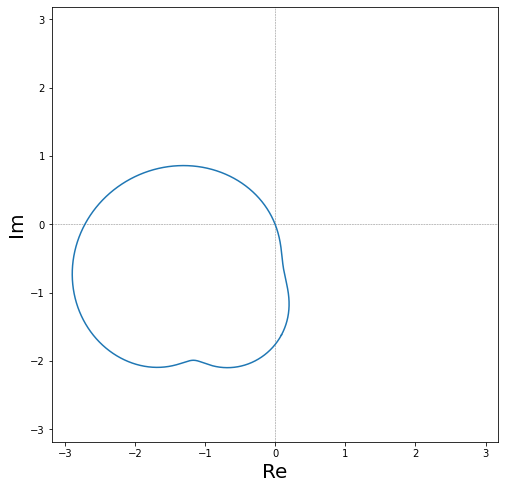

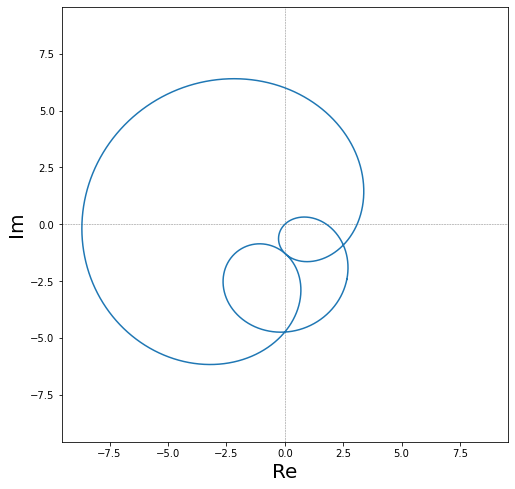

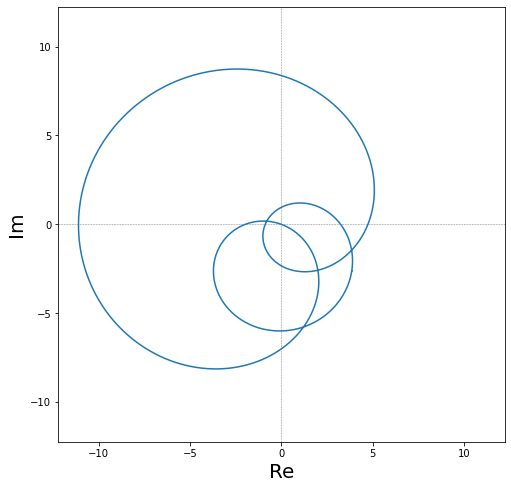

[(0.7846999999999973, (0.11843635123028326-0.7757105908180272j)), (0.949899999999998, (0.5482052105076717+0.7757454847901054j))]


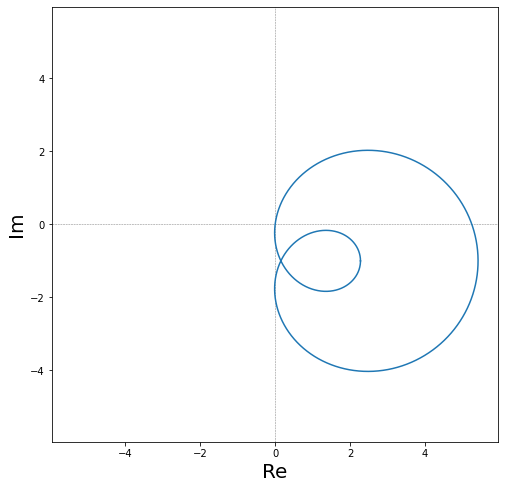

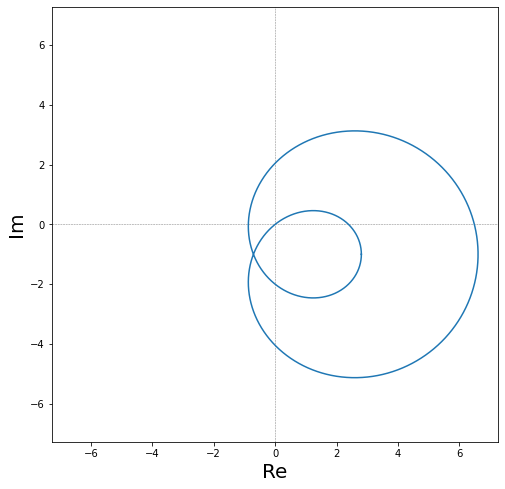

In [2]:
find_and_verify_roots(f1,3,3)
find_and_verify_roots(f1_prime,2,2)

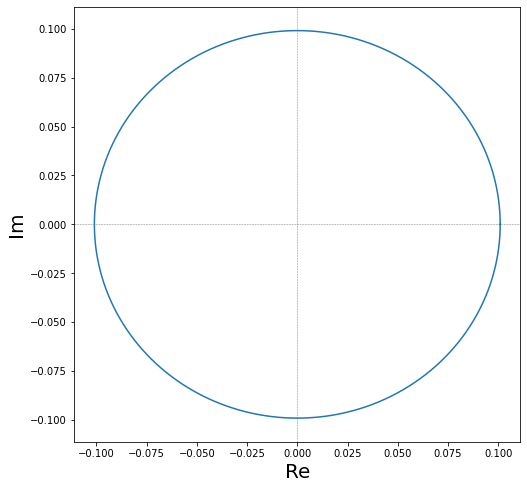

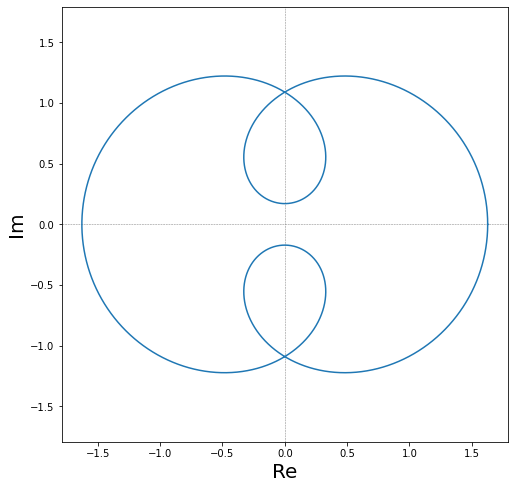

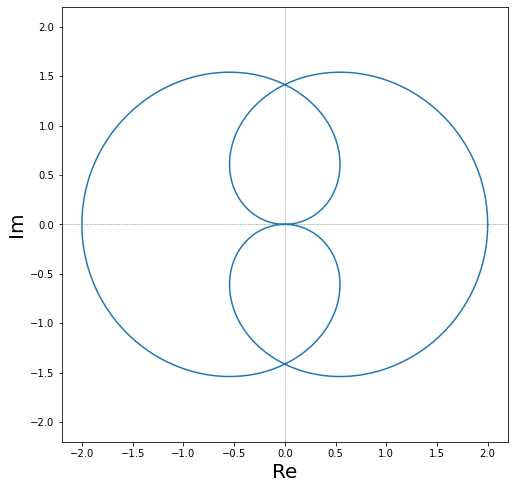

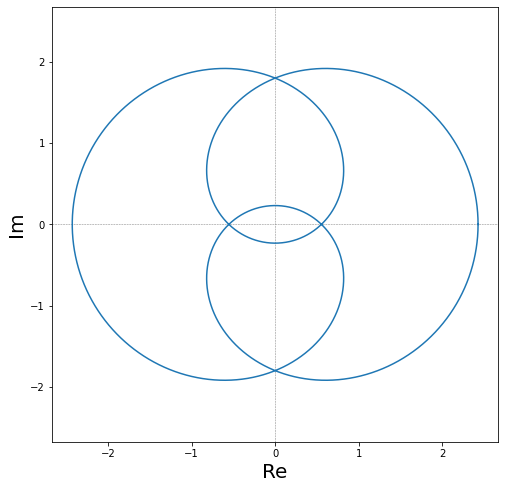

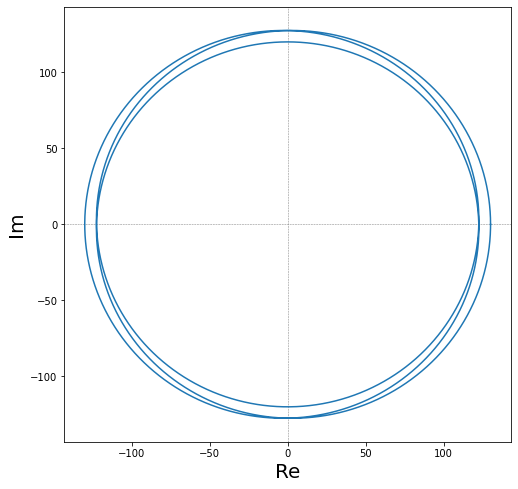

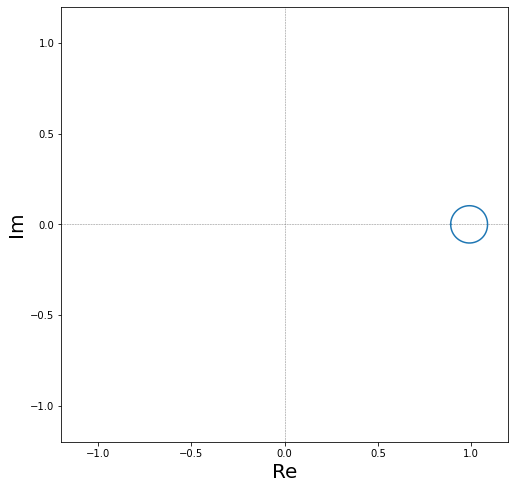

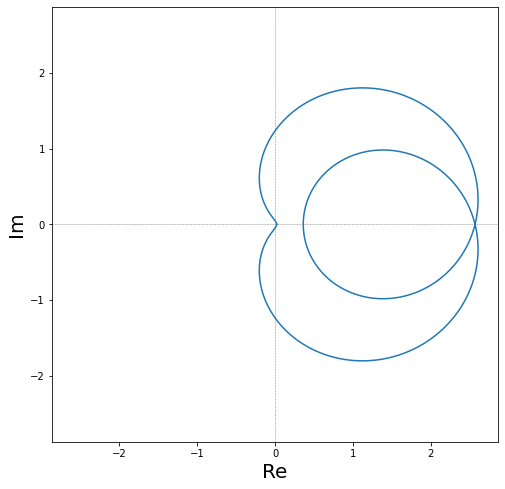

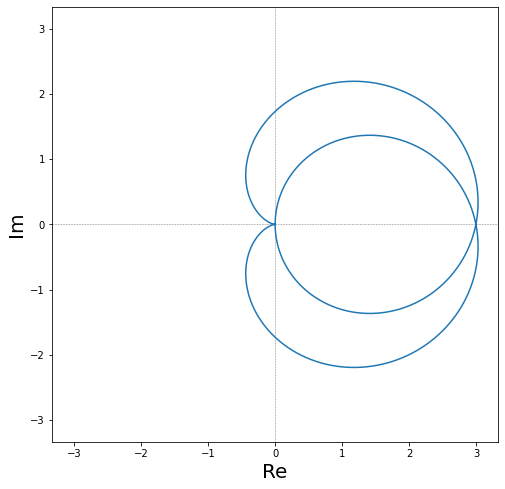

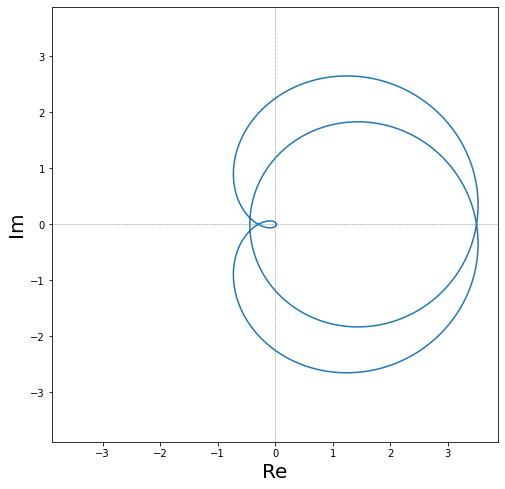

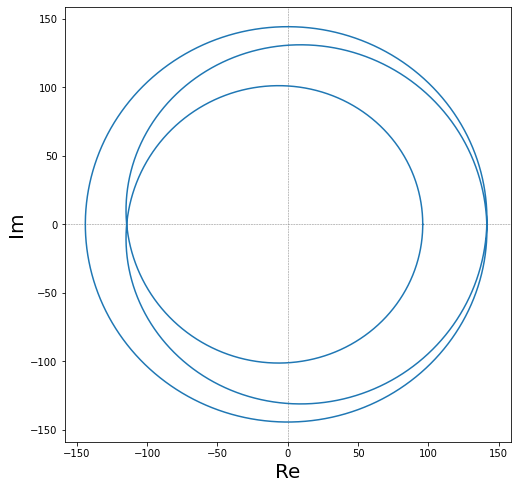

In [3]:
print_curves(g,[0.1,0.9,1,1.1,5])
print_curves(h,[0.1,0.9,1,1.1,5])


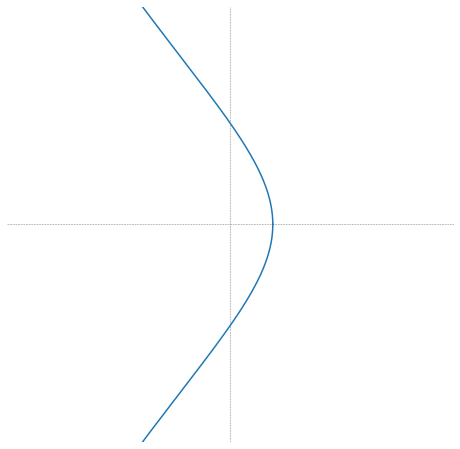

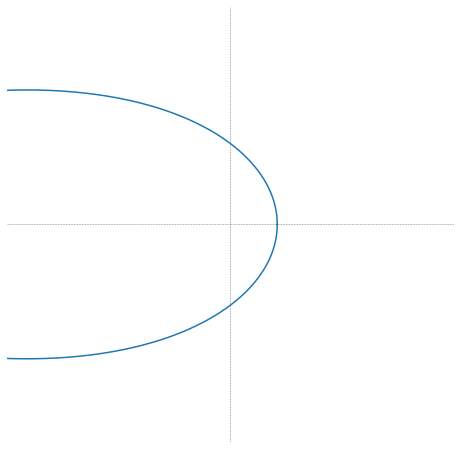

In [4]:
print_zoom_curves(h,[0.9,1.1],0.1)

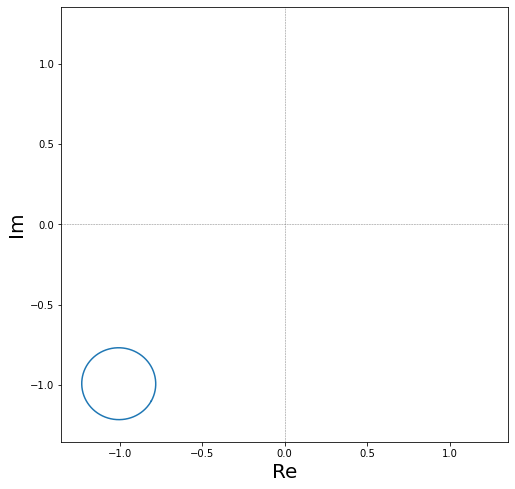

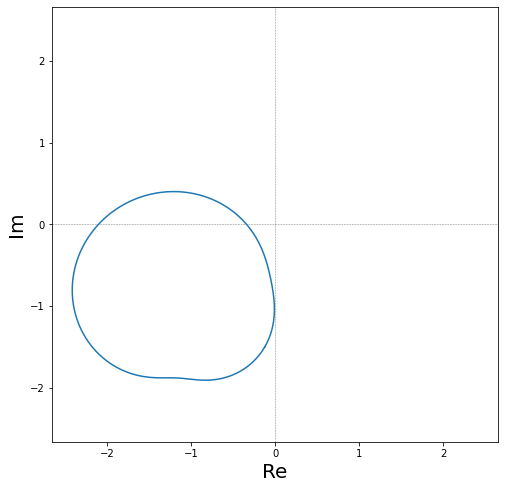

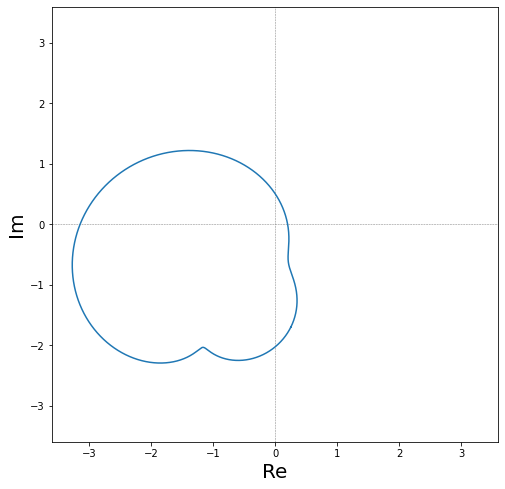

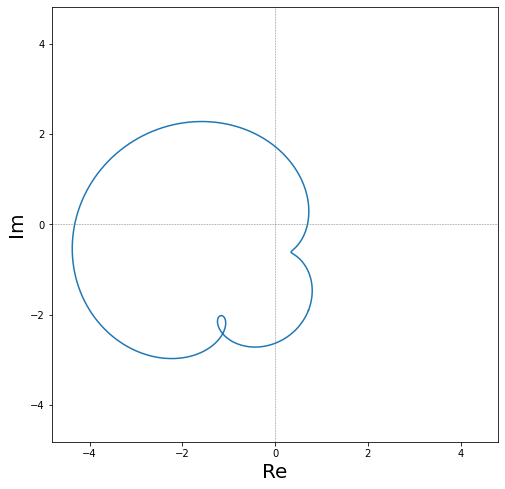

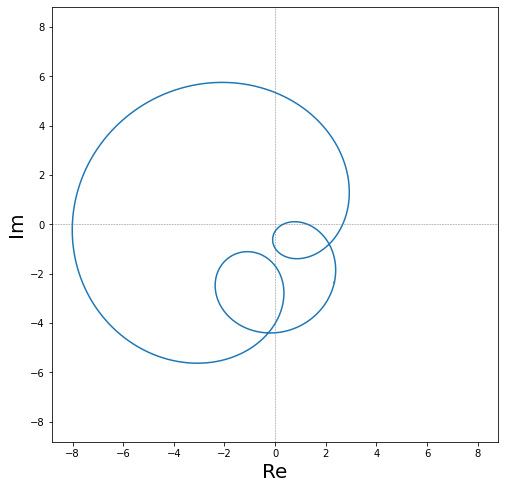

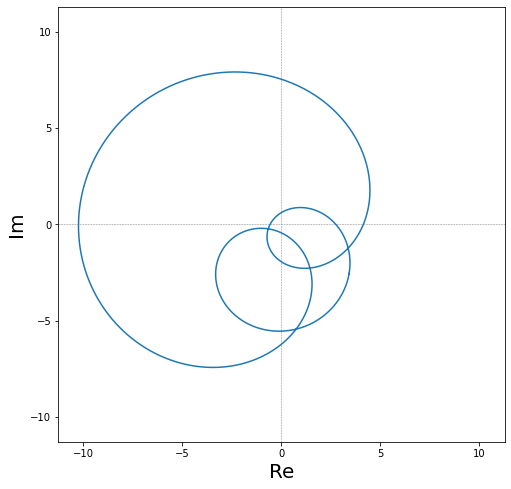

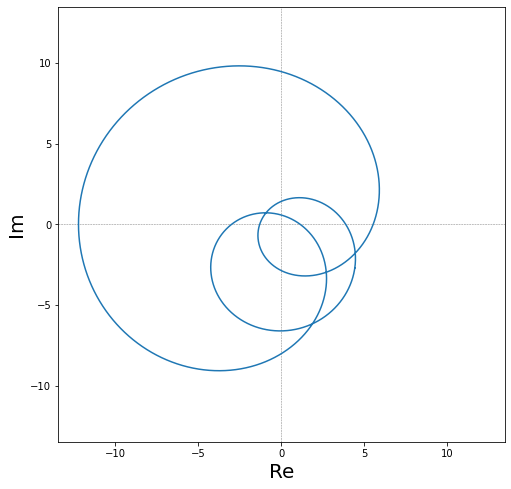

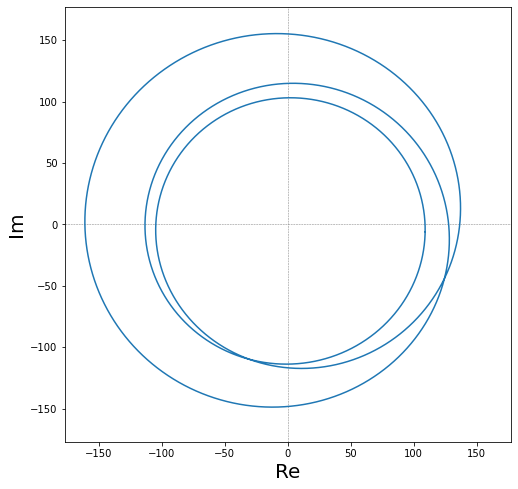

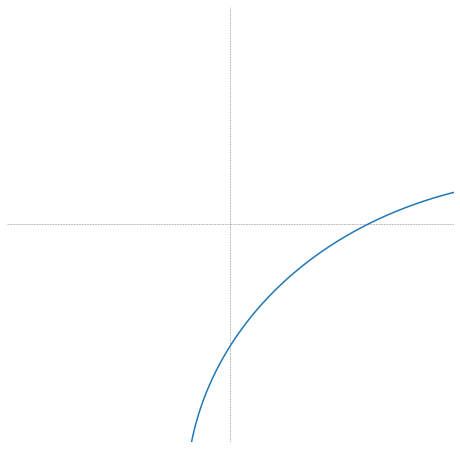

In [5]:
print_curves(f1,[0.1,0.5,0.7,0.9,1.35,1.55,1.7,5])
print_zoom_curves(f1,[1.35],0.5)


[(0.1, 6.283199134410786), (0.11, 6.283199084971266), (0.12, 6.283199042804026), (0.13, 6.283199008016634), (0.13999999999999999, 6.283198980708435), (0.14999999999999997, 6.283198960971736), (0.15999999999999998, 6.283198948890476), (0.16999999999999998, 6.283198944540619), (0.17999999999999997, 6.283198947990233), (0.18999999999999995, 6.2831989592992565), (0.19999999999999996, 6.2831989785195645), (0.20999999999999996, 6.283199005695173), (0.21999999999999995, 6.283199040861563), (0.22999999999999995, 6.283199084046783), (0.23999999999999994, 6.28319913527018), (0.24999999999999992, 6.283199194543766), (0.2599999999999999, 6.283199261871019), (0.2699999999999999, 6.28319933724824), (0.2799999999999999, 6.283199420662978), (0.2899999999999999, 6.283199512095295), (0.29999999999999993, 6.283199611517371), (0.30999999999999994, 6.283199718893515), (0.3199999999999999, 6.283199834180112), (0.32999999999999985, 6.283199957325653), (0.33999999999999986, 6.28320008827081), (0.3499999999999

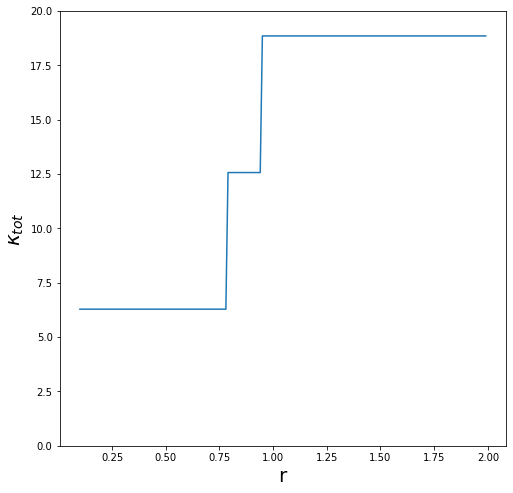

[(0.1, 6.283200855892421), (0.11, 6.283201029333965), (0.12, 6.283201216890161), (0.13, 6.28320141796133), (0.13999999999999999, 6.2832016319188675), (0.14999999999999997, 6.283201858108447), (0.15999999999999998, 6.283202095855455), (0.16999999999999998, 6.283202344469532), (0.17999999999999997, 6.283202603248464), (0.18999999999999995, 6.283202871483335), (0.19999999999999996, 6.2832031484614745), (0.20999999999999996, 6.283203433471944), (0.21999999999999995, 6.283203725807762), (0.22999999999999995, 6.283204024770164), (0.23999999999999994, 6.283204329671373), (0.24999999999999992, 6.283204639838056), (0.2599999999999999, 6.283204954612459), (0.2699999999999999, 6.283205273356529), (0.2799999999999999, 6.283205595452337), (0.2899999999999999, 6.283205920304382), (0.29999999999999993, 6.283206247341016), (0.30999999999999994, 6.28320657601513), (0.3199999999999999, 6.283206905805444), (0.32999999999999985, 6.283207236216815), (0.33999999999999986, 6.2832075667807326), (0.34999999999

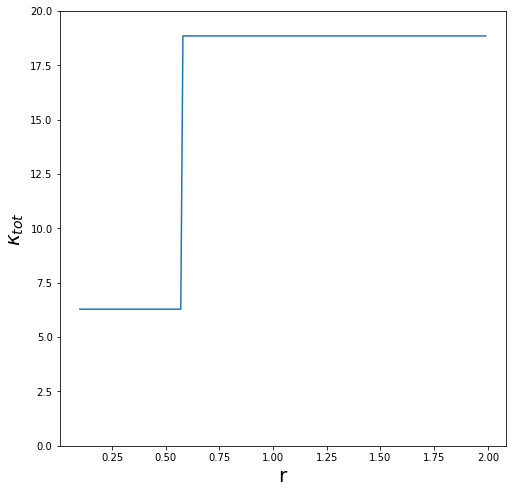

[(0.105, 6.283201795834229), (0.11499999999999999, 6.283201859553882), (0.12499999999999999, 6.283201908158529), (0.13499999999999998, 6.283201942197834), (0.14499999999999996, 6.283201962156291), (0.15499999999999997, 6.283201968458733), (0.16499999999999998, 6.2832019614752115), (0.17499999999999996, 6.2832019415251406), (0.18499999999999994, 6.283201908881213), (0.19499999999999995, 6.2832018637717315), (0.20499999999999996, 6.283201806384153), (0.21499999999999994, 6.283201736866432), (0.22499999999999992, 6.283201655329834), (0.23499999999999993, 6.283201561849613), (0.24499999999999994, 6.28320145646717), (0.2549999999999999, 6.283201339190079), (0.2649999999999999, 6.283201209993739), (0.2749999999999999, 6.283201068821151), (0.2849999999999999, 6.283200915583766), (0.2949999999999999, 6.283200750161155), (0.3049999999999999, 6.283200572400973), (0.3149999999999999, 6.283200382118633), (0.3249999999999999, 6.283200179096743), (0.33499999999999985, 12.566385270263575), (0.3449999

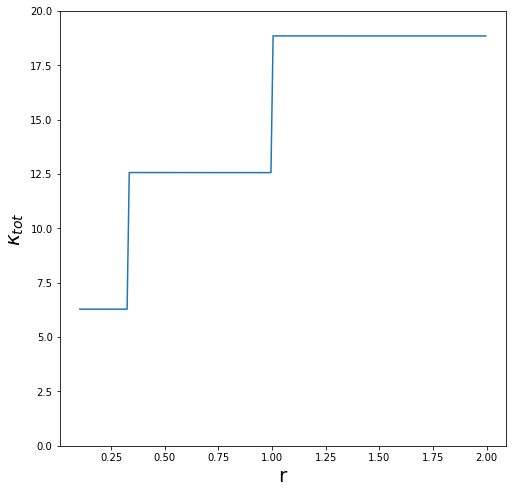

In [6]:
plot_curvature(f1,f1_prime,f1_prime_prime,0.1,2)
plot_curvature(g,g_prime,g_prime_prime,0.1,2)
plot_curvature(h,h_prime,h_prime_prime,0.105,2)

[(0.105, 6.283201795834229), (0.11499999999999999, 6.283201859553882), (0.12499999999999999, 6.283201908158529), (0.13499999999999998, 6.283201942197834), (0.14499999999999996, 6.283201962156291), (0.15499999999999997, 6.283201968458733), (0.16499999999999998, 6.2832019614752115), (0.17499999999999996, 6.2832019415251406), (0.18499999999999994, 6.283201908881213), (0.19499999999999995, 6.2832018637717315), (0.20499999999999996, 6.283201806384153), (0.21499999999999994, 6.283201736866432), (0.22499999999999992, 6.283201655329834), (0.23499999999999993, 6.283201561849613), (0.24499999999999994, 6.28320145646717), (0.2549999999999999, 6.283201339190079), (0.2649999999999999, 6.283201209993739), (0.2749999999999999, 6.283201068821151), (0.2849999999999999, 6.283200915583766), (0.2949999999999999, 6.283200750161155), (0.3049999999999999, 6.283200572400973), (0.3149999999999999, 6.283200382118633), (0.3249999999999999, 6.283200179096743), (0.33499999999999985, 12.566385270263575), (0.3449999

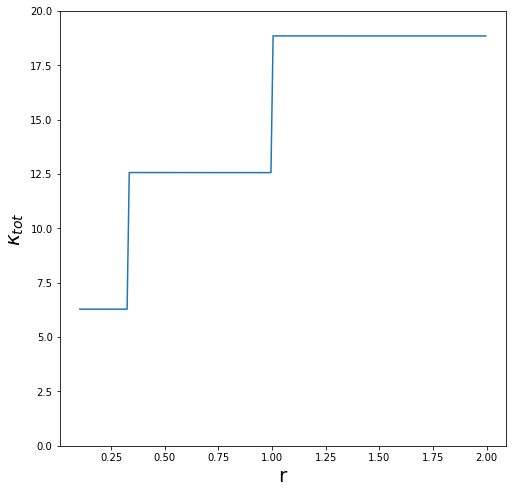

In [7]:
plot_curvature(h,h_prime,h_prime_prime,0.105,2)